# Fig. 1, stimulating complete neuron model with step current

## Importing useful functions and packages

In [1]:
### Importing useful packages
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from matplotlib.pylab import *
from matplotlib import rc
from scipy.optimize import curve_fit
from copy import copy
from matplotlib import rc
import matplotlib.ticker as ticker

In [2]:
### defining global variables (used mainly in ODEs used to find initial steady states)
global delta_t, thresh, resol, sp_window, time_stim, precision_convergence_ss
precision_convergence_ss=0.00001
thresh=-30 #mV
resol=0.01#ms (min resolution of integration)
delta_t=resol #ms
sp_window=2#ms
time_stim=1000#ms


In [3]:
######Importing useful functions
exec(open("./functions/f_stimulations_simulations.py").read())
exec(open("./functions/f_post_simulation_analysis.py").read())
exec(open("./functions/f_plots.py").read())
exec(open("./functions/f_saving_plots.py").read())


## Defining neuron-model 

In [4]:
####### Model to Analyze
s_model_abrev="MTM_W_sPNaS_sICD"
s_model="neuron_"+s_model_abrev
exec(open("./cfg/m_"+s_model_abrev+".py").read())

In [5]:
### Creating neuron instance of class defined in "s_model"
d_Pars=eval("Pars_"+s_model_abrev)
identifier = getattr(sys.modules[__name__], s_model)
neuron2=identifier(d_Pars)


In [6]:
## Defining dir 2 save figs
dir_figs='./figs/'


## Running simulation

In [7]:
#######################################################################################
#######################################################################################
#######################################################################################
##########Fig. 1 Step Current stimulus.. #######################
step_size=2.2#uA/cm2
stim_duration=20000.0#ms
baseline_size=-0.8#uA/cm2 (current below threshold)
interval0=500#ms time of step start
intervalf=10000#ms end of step

#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
########## Setting initial conditions... #########################################################
i_sn=[ii for ii,i_s in enumerate(neuron2.s_state_vars) if i_s=='K_o'][0]
neuron2.current_state[i_sn]=neuron2.current_state[i_sn]-3
K_o=neuron2.current_state[i_sn]
print(K_o)

i_sn=[ii for ii,i_s in enumerate(neuron2.s_state_vars) if i_s=='Na_i'][0]
Na_i=neuron2.current_state[i_sn]
print(Na_i)

i_sn=[ii for ii,i_s in enumerate(neuron2.s_state_vars) if i_s=='K_i'][0]
K_i=neuron2.current_state[i_sn]
print(K_i)


5
10
150


/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/ipykernel_launcher.py:239: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [ ]:
##########Fig. 1 Simulation.. #########################################################

sim=step_current_simulation_small_interval(neuron2,step_size,stim_duration,curr0=baseline_size,interval0=interval0,intervalf=intervalf,compress=[])


## Visualizing simulation

In [8]:
# #######################################################################################
# ##########3 Figure cfg format PLOS.. #######################
# #######################################################################################
import json
P= json.load(open("cfg/PLOSmpl.json")) # import plot parameter
matplotlib.rcParams.update([(j,k) for (j,k) in P.items()
                            if j in matplotlib.rcParams.keys()])

0
E_Na
1
E_K


/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied.

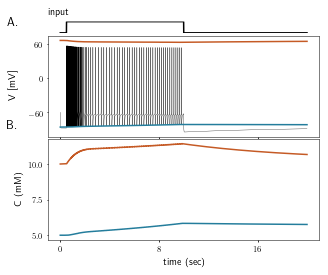

In [9]:
# #######################################################################################
# ##########3 Figure cfg.. #######################
# #######################################################################################
f1 = plt.figure(facecolor="1")

ax=[]
ax.append(plt.subplot2grid((15, 1), (0, 0), rowspan=1))
ax.append(plt.subplot2grid((15, 1), (1, 0), rowspan=7, sharex=ax[0]))
ax.append(plt.subplot2grid((15, 1), (8, 0), rowspan=7, sharex=ax[0]))

############################################
##### Plot Stimulus
##############################################3
exec(sim.d_Protocol['s_Executable_stimulus'])
I=[I_exp1(i)  for i in sim.a_Results.t]
c=[0,0,0]## Defines color
ax[0].plot(sim.a_Results.t/1000.0, I,color=c,rasterized=True)

## removing axes of stimulus
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].spines['right'].set_color('white')
for t in ax[0].xaxis.get_ticklines(): t.set_color('white')
for t in ax[0].yaxis.get_ticklines(): t.set_color('white')
ax[0].set_title('input', loc='left')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

############################################
#### Plot voltage trace
############################################
ax[1].plot(sim.a_Results.t/1000.0,sim.a_Results.V,color=c,linewidth=matplotlib.rcParams['lines.linewidth']*0.2)
ax[1].set_ylabel(r'V [mV]',labelpad=10)
## managing ticks
locatory = ticker.MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[1].yaxis.set_major_locator(locatory)
locatorx = ticker.MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[1].xaxis.set_major_locator(locatorx)
############################################
##### Plot nernst potentials #####
############################################
E_vv=[]
E_vv=[]
c=0
for i in sim.a_Results.t:
	inst_state= [None] * len(sim.c_neuron.s_state_vars)
	cc=0
	for j in sim.c_neuron.s_state_vars:
	    inst_state[cc]=(getattr(sim.a_Results,j)[c])
	    cc+=1
	E_vv.append(sim.c_neuron.resting_membrane_potentials(inst_state))
	c+=1

E_vm=matrix(E_vv)
c=0
for j in sim.c_neuron.s_resting_membrane_potentials:
	if j=='E_K':
		ax[1].plot(sim.a_Results.t/1000.0, E_vm[:,c],color=[0.141, 0.49, 0.612],label='$'+j+'$',rasterized=True)
		print(c)
		print(j)
	if j=='E_Na':
		ax[1].plot(sim.a_Results.t/1000.0, E_vm[:,c],color=[0.773, 0.353, 0.145],label='$'+'E_{Na}'+'$',rasterized=True)
		print(c)
		print(j)
	c+=1
        
############################################    
# ##### Plot ionic concentrations
############################################
v_concs=['K_o','Na_i']
for i in v_concs:
    if i=='Na_i':
        ax[2].plot(sim.a_Results.t/1000.0, getattr(sim.a_Results,i),color=[0.773, 0.353, 0.145],label='$'+i+'$',rasterized=True)
    if i=='K_o':
        ax[2].plot(sim.a_Results.t/1000.0, getattr(sim.a_Results,i),color=[0.141, 0.49, 0.612],label='$'+i+'$',rasterized=True)

###### Make fonts bigger,
ylbl2=ax[2].set_ylabel(r'C (mM)')
ax[2].set_xlabel(r'time (sec)')
###### and adding legend
locatory2 = ticker.MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[2].yaxis.set_major_locator(locatory2)
        
        
import string
for n, axs in enumerate(ax[1:]):   
    axs.text(-0.15, 1.1, string.ascii_uppercase[n]+'.', transform=axs.transAxes, 
            size=12, weight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.8,right=0.85)

plt.show()

0
E_Na
1
E_K
3
i_p


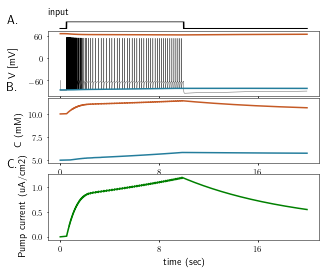

In [10]:
# #######################################################################################
# ##########3 Figure cfg.. #######################
# #######################################################################################
f1 = plt.figure(facecolor="1")

ax=[]
ax.append(plt.subplot2grid((23, 1), (0, 0), rowspan=1))
ax.append(plt.subplot2grid((23, 1), (1, 0), rowspan=7, sharex=ax[0]))
ax.append(plt.subplot2grid((23, 1), (8, 0), rowspan=7, sharex=ax[0]))
ax.append(plt.subplot2grid((23, 1), (16, 0), rowspan=7, sharex=ax[0]))
############################################
##### Plot Stimulus
##############################################3
exec(sim.d_Protocol['s_Executable_stimulus'])
I=[I_exp1(i)  for i in sim.a_Results.t]
c=[0,0,0]## Defines color
ax[0].plot(sim.a_Results.t/1000.0, I,color=c,rasterized=True)
##3 removing axes of stimulus
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].spines['right'].set_color('white')
for t in ax[0].xaxis.get_ticklines(): t.set_color('white')
for t in ax[0].yaxis.get_ticklines(): t.set_color('white')
ax[0].set_title('input', loc='left')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

############################################
#### Plot voltage trace
############################################
ax[1].plot(sim.a_Results.t/1000.0,sim.a_Results.V,color=c,linewidth=matplotlib.rcParams['lines.linewidth']*0.2)
ax[1].set_ylabel(r'V [mV]',labelpad=10)

locatory = ticker.MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[1].yaxis.set_major_locator(locatory)

locatorx = ticker.MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[1].xaxis.set_major_locator(locatorx)
############################################
##### Plot nernst potentials #####
############################################
E_vv=[]
c=0
for i in sim.a_Results.t:
	inst_state= [None] * len(sim.c_neuron.s_state_vars)
	cc=0
	for j in sim.c_neuron.s_state_vars:
	    inst_state[cc]=(getattr(sim.a_Results,j)[c])
	    cc+=1
	E_vv.append(sim.c_neuron.resting_membrane_potentials(inst_state))
	c+=1

E_vm=matrix(E_vv)
c=0
for j in sim.c_neuron.s_resting_membrane_potentials:
	if j=='E_K':
		ax[1].plot(sim.a_Results.t/1000.0, E_vm[:,c],color=[0.141, 0.49, 0.612],label='$'+j+'$',rasterized=True)
		print(c)
		print(j)
	if j=='E_Na':
		ax[1].plot(sim.a_Results.t/1000.0, E_vm[:,c],color=[0.773, 0.353, 0.145],label='$'+'E_{Na}'+'$',rasterized=True)
		print(c)
		print(j)
	c+=1
    
    
############################################    
# ##### Plot ionic concentrations
############################################
v_concs=['K_o','Na_i']
for i in v_concs:
    if i=='Na_i':
        ax[2].plot(sim.a_Results.t/1000.0, getattr(sim.a_Results,i),color=[0.773, 0.353, 0.145],label='$'+i+'$',rasterized=True)
    if i=='K_o':
        ax[2].plot(sim.a_Results.t/1000.0, getattr(sim.a_Results,i),color=[0.141, 0.49, 0.612],label='$'+i+'$',rasterized=True)

###### Make fonts bigger,
ylbl2=ax[2].set_ylabel(r'C (mM)')
ax[2].set_xlabel(r'time (sec)')
###### and adding legend
locatory2 = ticker.MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[2].yaxis.set_major_locator(locatory2)

############################################
##### Plot currents #####
############################################
I_vv=[]
c=0
for i in sim.a_Results.t:
	inst_state= [None] * len(sim.c_neuron.s_state_vars)
	cc=0
	for j in sim.c_neuron.s_state_vars:
	    inst_state[cc]=(getattr(sim.a_Results,j)[c])
	    cc+=1
	I_vv.append(sim.c_neuron.neuron_currents(inst_state))
	c+=1

I_vm=matrix(I_vv)
c=0
for j in sim.c_neuron.s_currents:
    if j=='i_p':
        ax[3].plot(sim.a_Results.t/1000.0, I_vm[:,c],color='g',label='$'+j+'$',rasterized=True)
        print(c)
        print(j)
    c+=1

###### Make fonts bigger,
ylbl3=ax[3].set_ylabel(r'Pump current (uA/cm2)')
ax[3].set_xlabel(r'time (sec)')
###### and adding legend
locatory3 = ticker.MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[3].yaxis.set_major_locator(locatory3)        
        
import string
for n, axs in enumerate(ax[1:]):   
    axs.text(-0.15, 1.1, string.ascii_uppercase[n]+'.', transform=axs.transAxes, 
            size=12, weight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.8,right=0.85)

plt.show()

## Detecting spikes to compare first and last

In [11]:
t=sim.a_Results.t;V=sim.a_Results.V

fr=np.zeros(size(t))
t_sp=np.zeros(size(t))
d=[]
sp=[]
i_n=[]
d=detect_peaks(V)
if d==[] or len(d)<2:
    fr=np.zeros(size(t))
    t_sp=np.zeros(size(t))
else:
    sp=V[d]>thresh
    if np.count_nonzero(sp)>2:
        i=np.transpose(sp)*d
        i_n=i[np.nonzero(i)]
        t_sp=t[i_n]
        t_sp=t_sp.reshape(size(t_sp),1)
        fr=1/(np.diff(t_sp, n=1, axis=0)/1000)
        t_sp=t_sp[:-1]
    else:
        fr=np.zeros(size(t))
        t_sp=t
        


/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


In [12]:
t1st_spk=t_sp[0]
tlast_spk=t_sp[-1]
dt=3

/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


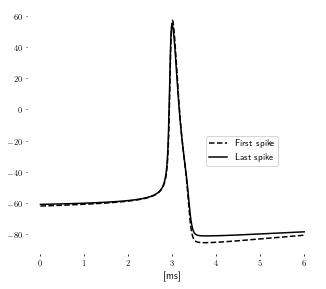

In [13]:
fig, ax = plt.subplots(1,1)

v_t=t;v_V=V
    
    
ax.plot(np.linspace(0,2*dt,len(v_V[(v_t>t1st_spk-dt)*(v_t<t1st_spk+dt)])),v_V[(v_t>t1st_spk-dt)*(v_t<t1st_spk+dt)],'--',color=[0,0,0],label='First spike')
ax.plot(np.linspace(0,2*dt,len(v_V[(v_t>tlast_spk-dt)*(v_t<tlast_spk+dt)])),v_V[(v_t>tlast_spk-dt)*(v_t<tlast_spk+dt)],color=[0,0,0],label='Last spike')
ax.set_xlabel('[ms]')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)


pleg=ax.legend(bbox_to_anchor=(0.6,0.5), loc="best")
# pleg()
plt.show()

0
E_Na


/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


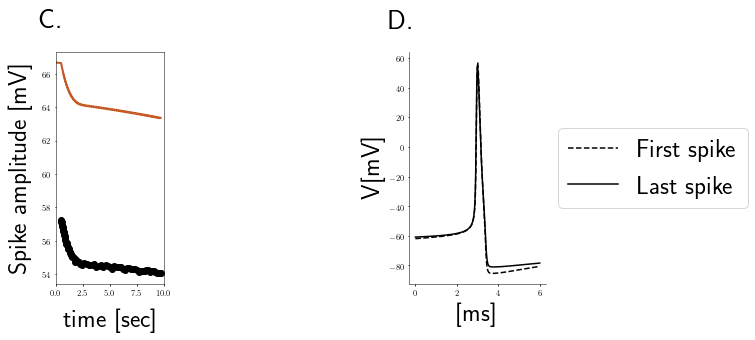

In [14]:
#######################################################################################
##########3 Figure extension.. #######################
#######################################################################################
# fig_height=8

fig_height=5
fig_wide=15

size_legend_font=25

#######################################################################################
##########3 Figure matching with nice layout.. #######################
#######################################################################################

f1 = plt.figure(facecolor="1",figsize=(fig_wide,fig_height))
ax=[]

ax.append(plt.subplot2grid((7,12), (0, 0), colspan=4,rowspan=6))
ax.append(plt.subplot2grid((7,12), (0, 5), colspan=5,rowspan=6))


###### Trying to plot spk amplitude...
dt=3
v_t_ampl=[]
v_V_max=[]
v_V_min=[]
for i_tt in t_sp:
    v_t_ampl.append(v_t[(v_t>i_tt-dt)*(v_t<i_tt+dt)][argmax(v_V[(v_t>i_tt-dt)*(v_t<i_tt+dt)])])
    v_V_max.append(max(v_V[(v_t>i_tt-dt)*(v_t<i_tt+dt)]))
    v_V_min.append(min(v_V[(v_t>i_tt-dt)*(v_t<i_tt+dt)]))

ax[0].plot(np.array(v_t_ampl)/1000.0,np.array(v_V_max),'o',color='k',rasterized=True)
c=0
for j in sim.c_neuron.s_resting_membrane_potentials:
	if j=='E_Na':
		ax[0].plot(sim.a_Results.t[sim.a_Results.t<max(v_t_ampl)]/1000.0, E_vm[:,c][sim.a_Results.t<max(v_t_ampl)],linewidth=2,color=[0.773, 0.353, 0.145],label='$'+'E_{Na}'+'$',rasterized=True)
		print(c)
		print(j)
	c+=1
    
ax[0].set_xlim([0,10])
ax[0].set_xlabel(r'time [sec]',labelpad=10)
ax[0].set_ylabel(r'Spike amplitude [mV]',labelpad=10)

##### Trying to plot 1st vs last spike...
ax[1].plot(np.linspace(0,2*dt,len(v_V[(v_t>t1st_spk-dt)*(v_t<t1st_spk+dt)])),v_V[(v_t>t1st_spk-dt)*(v_t<t1st_spk+dt)],'--',color='k',label='First spike',rasterized=True)
ax[1].plot(np.linspace(0,2*dt,len(v_V[(v_t>tlast_spk-dt)*(v_t<tlast_spk+dt)])),v_V[(v_t>tlast_spk-dt)*(v_t<tlast_spk+dt)],color='k',label='Last spike',rasterized=True)
ax[1].set_xlabel('[ms]')
ax[1].set_ylabel('V[mV]')

ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
#         ax_aux.spines["left"].set_visible(False)
#         ax_aux.spines["bottom"].set_visible(False)




box0 = ax[0].get_position()
box1 = ax[1].get_position()
# box3 = ax[3].get_position()

ax[0].set_position([box0.x0, box0.y0, box0.width * 0.4, box0.height])
ax[1].set_position([box1.x0, box1.y0, box1.width * 0.4, box1.height])
#  Put a legend to the right of the current axis
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': size_legend_font})

import string
for n, axs in enumerate(ax):   
    axs.text(-0.15, 1.1, string.ascii_uppercase[n+2]+'.', transform=axs.transAxes, 
            size=12+3, weight='bold')




plt.show()

0
E_Na
1
E_K
0
E_Na


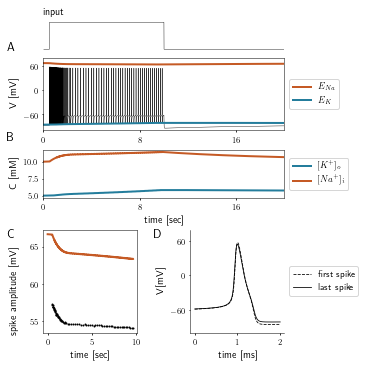

In [15]:
#########################################################
#########################################################
#### Used this for submission! 
#########################################################3
#########################################################


import json
P= json.load(open("cfg/PLOSmpl.json")) # import plot parameter
matplotlib.rcParams.update([(j,k) for (j,k) in P.items()
                            if j in matplotlib.rcParams.keys()])

plt.close("all")

matplotlib.rcParams['lines.linewidth']=2.0
fig_wide=rcParams["figure.figsize"][0]
fig_height=rcParams["figure.figsize"][1]

f1 = plt.figure(facecolor="1",figsize=(fig_wide,fig_height*1.3))

ax=[]
ax.append(plt.subplot2grid((52, 12), (0, 0), colspan=10, rowspan=5))
ax.append(plt.subplot2grid((52, 12), (6, 0), colspan=10, rowspan=12, sharex=ax[0]))
ax.append(plt.subplot2grid((52, 12), (21, 0), colspan=10, rowspan=8, sharex=ax[0]))
ax.append(plt.subplot2grid((52,12), (34, 0), colspan=4,rowspan=17))
ax.append(plt.subplot2grid((52,12), (34, 6), colspan=4,rowspan=17, sharey=ax[1]))

############################################
##### Plot Stimulus
##############################################3
exec(sim.d_Protocol['s_Executable_stimulus'])
I=[I_exp1(i)  for i in sim.a_Results.t]
ax[0].plot(sim.a_Results.t/1000.0, I,color=[0,0,0],linewidth=matplotlib.rcParams['lines.linewidth']*0.2,rasterized=True)
ax[0].set_xlim([0,20.0])

##3 removing axes of stimulus
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].spines['right'].set_color('white')
for t in ax[0].xaxis.get_ticklines(): t.set_color('white')
for t in ax[0].yaxis.get_ticklines(): t.set_color('white')
ax[0].set_title('input', loc='left')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

############################################
#### Plot voltage trace
############################################
ax[1].plot(sim.a_Results.t/1000.0,sim.a_Results.V,color=[0,0,0],linewidth=matplotlib.rcParams['lines.linewidth']*0.2)
ax[1].set_ylim([-100,80])
ax[1].set_ylabel(r'V [mV]')

locatory = MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[1].yaxis.set_major_locator(locatory)

locatorx = MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[1].xaxis.set_major_locator(locatorx)
############################################
##### Plot nernst potentials #####
############################################
E_vv=[]
c=0
for i in sim.a_Results.t:
	inst_state= [None] * len(sim.c_neuron.s_state_vars)
	cc=0
	for j in sim.c_neuron.s_state_vars:
	    inst_state[cc]=(getattr(sim.a_Results,j)[c])
	    cc+=1
	E_vv.append(sim.c_neuron.resting_membrane_potentials(inst_state))
	c+=1

E_vm=matrix(E_vv)
c=0
for j in sim.c_neuron.s_resting_membrane_potentials:
	if j=='E_K':
		ax[1].plot(sim.a_Results.t/1000.0, E_vm[:,c],color=[0.141, 0.49, 0.612],label='$'+j+'$')
		print(c)
		print(j)
	if j=='E_Na':
		ax[1].plot(sim.a_Results.t/1000.0, E_vm[:,c],color=[0.773, 0.353, 0.145],label='$'+'E_{Na}'+'$')
		print(c)
		print(j)
	c+=1
############################################    
# ##### Plot ionic concentrations
############################################
# ##### Plot ionic concentrations
v_concs=['K_o','Na_i']
for i in v_concs:
    if i=='Na_i':
        ax[2].plot(sim.a_Results.t/1000.0, getattr(sim.a_Results,i),color=[0.773, 0.353, 0.145],label='$[Na^+]_i$')
    if i=='K_o':
        ax[2].plot(sim.a_Results.t/1000.0, getattr(sim.a_Results,i),color=[0.141, 0.49, 0.612],label='$[K^+]_o$')
    
###### Make fonts bigger,
ylbl2=ax[2].set_ylabel(r'C [mM]')
ax[2].set_xlabel(r'time [sec]')
###### and adding legend
locatory2 = MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[2].yaxis.set_major_locator(locatory2)

############################################   
###### Plot spk amplitude...
############################################   

v_V=sim.a_Results.V
v_t=sim.a_Results.t
dt=1
v_t_ampl=[]
v_V_max=[]
v_V_min=[]
for i_tt in t_sp:
    v_t_ampl.append(v_t[(v_t>i_tt-dt)*(v_t<i_tt+dt)][argmax(v_V[(v_t>i_tt-dt)*(v_t<i_tt+dt)])])
    v_V_max.append(max(v_V[(v_t>i_tt-dt)*(v_t<i_tt+dt)]))
    v_V_min.append(min(v_V[(v_t>i_tt-dt)*(v_t<i_tt+dt)]))

ax[3].plot(np.array(v_t_ampl)/1000.0,np.array(v_V_max),'o',markersize=1,color=[0,0,0])
c=0
for j in sim.c_neuron.s_resting_membrane_potentials:
	if j=='E_Na':
		ax[3].plot(sim.a_Results.t[sim.a_Results.t<max(v_t_ampl)]/1000.0, E_vm[:,c][sim.a_Results.t<max(v_t_ampl)],color=[0.773, 0.353, 0.145],label='$'+'E_{Na}'+'$')
		print(c)
		print(j)
	c+=1
    
ax[3].set_xlabel(r'time [sec]')
ax[3].set_ylabel(r'spike amplitude [mV]')
locatory3 = MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[3].yaxis.set_major_locator(locatory3)

    
    
##### Plot 1st vs last spike...
ax[4].plot(np.linspace(0,2*dt,len(v_V[(v_t>t1st_spk-dt)*(v_t<t1st_spk+dt)])),v_V[(v_t>t1st_spk-dt)*(v_t<t1st_spk+dt)],'--',color=[0,0,0],linewidth=matplotlib.rcParams['lines.linewidth']*0.4,label='first spike')
ax[4].plot(np.linspace(0,2*dt,len(v_V[(v_t>tlast_spk-dt)*(v_t<tlast_spk+dt)])),v_V[(v_t>tlast_spk-dt)*(v_t<tlast_spk+dt)],color=[0,0,0],linewidth=matplotlib.rcParams['lines.linewidth']*0.4,label='last spike')
ax[4].set_xlabel('time [ms]')
ax[4].set_ylabel('V[mV]')
ax[4].spines["top"].set_visible(False)
ax[4].spines["right"].set_visible(False)

##############################################
####### placing legends
# Put a legend to the right of the current axis
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[4].legend(loc='center left', bbox_to_anchor=(1, 0.5))


############################################
### Aligning labels
############################################

labely = -0.1  # axes coords
ax[1].yaxis.set_label_coords(labely, 0.5)
ax[2].yaxis.set_label_coords(labely, 0.5)

### When axes are not exactly the same size.. this is necessary
box2 = ax[2].get_position()
box3 = ax[3].get_position()
ax[3].yaxis.set_label_coords(box2.width/box3.width*labely, 0.4)


############################################
####### Placing panel labels #############3#
############################################

lblloc_W=-0.15
lblloc_H=1.1
v_boxes=[]
import string
for n, axs in enumerate(ax[1:]):
    if n==0:
        v_boxes.append(axs.get_position())
        axs.text(lblloc_W, lblloc_H, string.ascii_uppercase[n], transform=axs.transAxes, 
                size=12, fontweight='bold')
    if n==1:
        v_boxes.append(axs.get_position())
        axs.text(v_boxes[0].width/v_boxes[-1].width*lblloc_W, 1.18, string.ascii_uppercase[n], transform=axs.transAxes, 
                size=12, fontweight='bold')
        
    if n==3 or n==2:
        v_boxes.append(axs.get_position())
        axs.text(v_boxes[0].width/v_boxes[-1].width*lblloc_W, 0.92, string.ascii_uppercase[n], transform=axs.transAxes, 
                size=12, fontweight='bold')


        
plt.show()